In [1]:
import pandas as pd
import re
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import figure
import wordcloud
from sklearn.preprocessing import OneHotEncoder
import matplotlib.animation as animation
sns.set()

In [2]:
datadf = pd.read_csv('All Data/Raw Journey Data/Until16May2020(all jsons to csv).csv')
datadf.rename(columns={'Unnamed: 0':'id'}, inplace=True)
datadf.set_index('id', inplace=True)
datadf.head()

,text,date_modified,date_journal,address,lat,lon,mood,timezone,favourite,weather,photos,tags,no_punc,is_personal
id,,,,,,,,,,,,,,
1439137473084-3fc756cc3f8d6404,"The first thing I saw ,when I entered her room...",2017-08-31 01:44:57,2015-08-09 11:24:33,NaN,1.7976931348623157e+308,1.7976931348623157e+308,0,NaN,False,"{'id': -1, 'degree_c': 1.7976931348623157e+308...",[],"['personal', 'published']",The first thing I saw when I entered her room ...,1
1439198245820-3fda14add91e3f20,Philosophy\n\n\n\n\n\n\nIt surprises me..hw u ...,2017-08-22 22:08:05,2015-08-10 04:17:25,NaN,1.7976931348623157e+308,1.7976931348623157e+308,0,NaN,False,"{'id': -1, 'degree_c': 1.7976931348623157e+308...",[],['personal'],Philosophy It surprises mehw u so effortlessly...,1
1439198461993-3fefd6db711e0342,Me \n\n\nWrite fantasies/inaginary dream world...,2017-10-08 12:24:49,2015-08-10 04:21:01,NaN,1.7976931348623157e+308,1.7976931348623157e+308,0,NaN,False,"{'id': -1, 'degree_c': 1.7976931348623157e+308...",[],['me'],Me Write fantasiesinaginary dream world storie...,0
1439575035515-3feb330512548cbd,"The dwarfs garden\n\nHe had a garden ,that lit...",2016-04-29 05:23:44,2015-08-14 12:57:15,NaN,1.7976931348623157e+308,1.7976931348623157e+308,0,NaN,False,"{'id': -1, 'degree_c': 1.7976931348623157e+308...",[],['published'],The dwarfs garden He had a garden that little ...,0
1440393646546-3fdb2bc02b9f8020,Brigadier Suraj singh\n\nMy name is brigadier ...,2017-08-18 05:27:31,2015-08-24 00:20:46,NaN,1.7976931348623157e+308,1.7976931348623157e+308,0,NaN,False,"{'id': -1, 'degree_c': 1.7976931348623157e+308...",[],['script'],Brigadier Suraj singh My name is brigadier sur...,0


In [3]:
timedata = pd.read_csv('All Data/Raw Journey Data/TimeDataUntil16May2020.csv')
timedata = timedata.set_index(timedata.columns[0])
timedata.head()

,date_journal,year,month,day,hour,minute,dayofweek,day_num,month_num,month_name,year_month,minute_of_day
id,,,,,,,,,,,,
1439137473084-3fc756cc3f8d6404,2015-08-09 11:24:33,2015,8,9,11,24,6,0,0,aug,2015 aug,684
1439198245820-3fda14add91e3f20,2015-08-10 04:17:25,2015,8,10,4,17,0,1,0,aug,2015 aug,257
1439198461993-3fefd6db711e0342,2015-08-10 04:21:01,2015,8,10,4,21,0,1,0,aug,2015 aug,261
1439575035515-3feb330512548cbd,2015-08-14 12:57:15,2015,8,14,12,57,4,5,0,aug,2015 aug,777
1440393646546-3fdb2bc02b9f8020,2015-08-24 00:20:46,2015,8,24,0,20,0,15,0,aug,2015 aug,20


In [4]:
drop_cols = ['text','date_modified','address','mood','favourite','weather','photos','tags','lat','lon']
datadf = datadf.drop(columns = drop_cols)

In [5]:
tidy_format = pd.read_csv('All Data/Raw Journey Data/TidyFormatUntil16May2020.csv')

In [6]:
word_counts = pd.read_csv(r'All Data/Raw Journey Data/Word_Counts_Until16May2020.csv')
word_counts

,Unnamed: 0,count
0,i,9776
1,the,8674
2,to,7831
3,and,7077
4,a,5714
...,...,...
19654,immeasurable,1
19655,7816,1
19656,flowannoy,1
19657,aaraha,1


In [7]:
word_counts = word_counts[word_counts['count']>1] # leave out words mentioned only once
word_counts = word_counts.rename(columns={'Unnamed: 0':'word'})
word_counts.iloc[0:200]

,word,count
0,i,9776
1,the,8674
2,to,7831
3,and,7077
4,a,5714
...,...,...
195,started,172
196,does,171
197,year,171
198,wont,170


In [8]:
most_used_eng = pd.read_csv(r'All Data/20k-most-used-english-words.txt', sep=' ', header=None).rename(columns={0:'word'})

In [9]:
word_counts.iloc[0:200][list(map(lambda x : x not in list(most_used_eng['word'].iloc[0:200].values), list(word_counts['word'].iloc[0:200].values)))]
# words in my top 200 that aren't in global top 200

,word,count
27,im,1218
28,dont,1155
44,want,851
50,know,772
55,things,680
...,...,...
193,happy,173
194,start,173
195,started,172
198,wont,170


In [79]:
title_words = tidy_format[tidy_format.word.str.istitle().fillna(False)]['word'].str.lower().value_counts().to_frame().reset_index()
title_words[title_words['index'].apply(lambda x: x not in stopwords).fillna(False)][0:50]

#most common title words


,index,word
36,maybe,132
38,even,121
42,aditya,115
43,india,114
44,people,112
48,one,95
49,oh,94
50,every,89
55,adi,78
56,theres,78


In [10]:
stopwords = ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', 've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn', "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"]

In [80]:
personal_stopwords = ["i've", "i'm","i'll", "like", "i'd", "he's", "she's", "he'd", "she'd", "that's", "there's"]

In [76]:
stopwords.extend(personal_stopwords)

In [77]:
stopwords = list(map(lambda x: re.sub('\'','',x), stopwords))

In [14]:
word_counts_dict = word_counts.set_index('word').to_dict()['count']

In [15]:
for word in stopwords:
    if word in word_counts_dict.keys():
        word_counts_dict.pop(word)

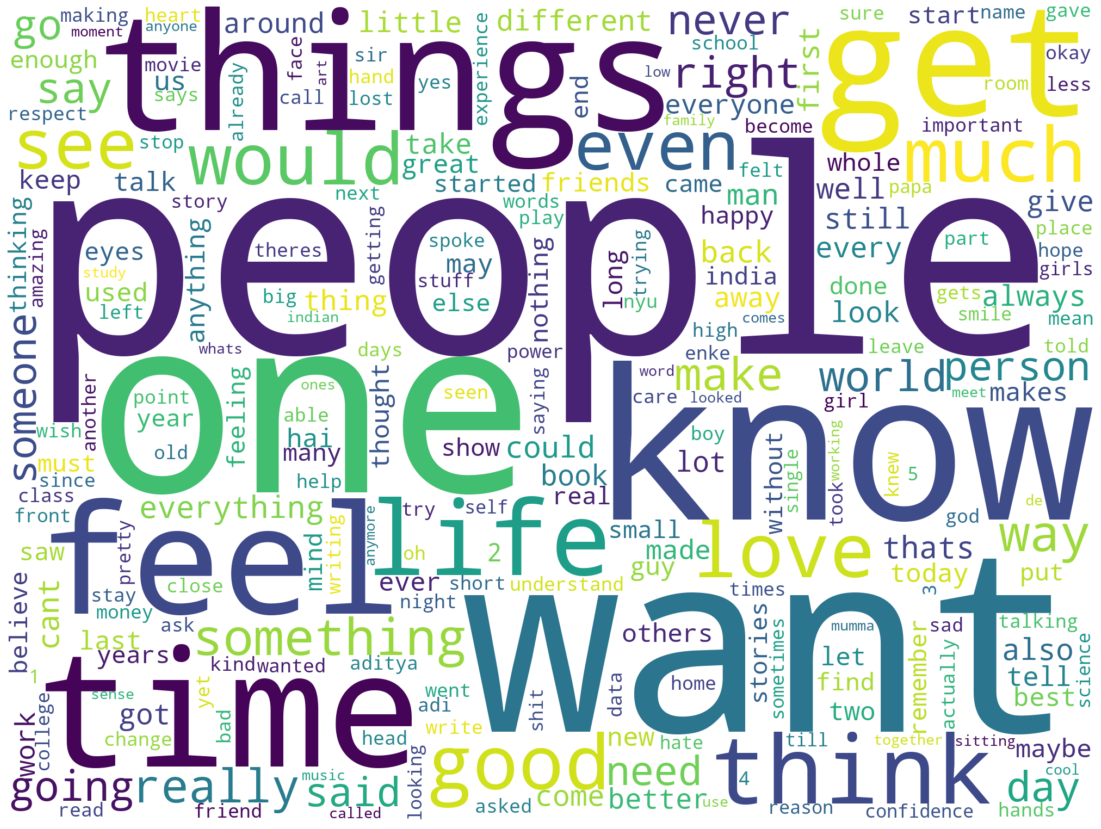

In [16]:
wc = wordcloud.WordCloud(stopwords = stopwords,
                    normalize_plurals = True, max_words=250, background_color = 'white', width=2000, height=1500, random_state=1).generate_from_frequencies(word_counts_dict)
plt.figure(figsize=(20,15))

plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
# plt.savefig('Figures saved from analyses/WordCloud(16May2020).png')
plt.show()

In [17]:
# I'm going to try to make an anmated word cloud for changes over time

In [18]:
top = list(wc.words_.keys())

In [19]:
month_occurences = tidy_format.merge(timedata['month_num'], on='id')[['lower','month_num']] #for all words, not grouped
month_occurences = month_occurences[month_occurences.lower.apply(lambda x: x in top)]

In [20]:
month_occurences['count'] =1
month_occurences

,lower,month_num,count
1,first,0,1
2,thing,0,1
4,saw,0,1
9,room,0,1
40,room,0,1
...,...,...,...
269725,would,57,1
269730,stories,57,1
269733,good,57,1
269734,story,57,1


In [21]:
top_words_monthwise = month_occurences.groupby(
    ['month_num','lower']).agg({'count':'sum'}).pivot_table(index='month_num', columns='lower').fillna(0)
top_words_monthwise

count                                                             \
lower         1     2     3     4    5  able actually   adi aditya already   
month_num                                                                    
0           0.0   1.0   0.0   0.0  0.0   2.0      0.0   0.0    1.0     1.0   
1           0.0   1.0   0.0   0.0  4.0   0.0      0.0   0.0    0.0     0.0   
2           2.0   1.0   0.0   0.0  0.0   2.0      3.0   0.0    1.0     2.0   
3           1.0   1.0   0.0   0.0  1.0   1.0      1.0   0.0    1.0     0.0   
4           0.0   0.0   0.0   0.0  0.0   0.0      0.0   0.0    0.0     0.0   
5           0.0   1.0   2.0   0.0  0.0   0.0      0.0   0.0    0.0     0.0   
6           3.0   0.0   0.0   0.0  0.0   0.0      1.0   1.0    0.0     1.0   
7           0.0   1.0   0.0   1.0  0.0   2.0      0.0   0.0    0.0     0.0   
8           2.0   2.0   0.0   0.0  0.0   2.0      3.0   0.0    0.0     1.0   
9           0.0   0.0   1.0   0.0  0.0   0.0      0.0   0.0    0.0     1.0   
10          0.0   0.0   0.0   0.0  1.0   0.0      1.0   0.0    0.0     0.0   
11          1.0   1.0   1.0   1.0  2.0   0.0      1.0   0.0    0.0     0.0   
12          0.0   0.0   0.0   0.0  0.0   1.0      0.0   0.0    0.0     0.0   
13          3.0   4.0   8.0   3.0  9.0   0.0      2.0   0.0    1.0     2.0   
14          0.0   0.0   0.0   0.0  0.0   0.0      0.0   0.0    0.0     0.0   
15          1.0   0.0   0.0   0.0  0.0   1.0      0.0   1.0    4.0     3.0   
16          1.0   3.0   1.0   1.0  5.0   1.0      2.0   0.0    0.0     1.0   
17          1.0   1.0   1.0   2.0  0.0   2.0      0.0   0.0    0.0     0.0   
18          9.0  18.0  17.0  13.0  5.0   0.0      3.0   0.0    3.0     0.0   
19          1.0   0.0   0.0   1.0  1.0   1.0      1.0   1.0    2.0     1.0   
20          5.0   9.0   5.0   3.0  4.0   6.0      2.0   0.0    3.0     2.0   
21          2.0   2.0   1.0   1.0  3.0   3.0      1.0   0.0    0.0     1.0   
22          1.0   1.0   3.0   4.0  2.0   4.0      2.0   0.0    0.0     0.0   
23          8.0  10.0   6.0  10.0  3.0   7.0     15.0   6.0    7.0     3.0   
24          0.0   0.0   2.0   7.0  4.0   3.0      1.0   1.0    1.0     1.0   
25          8.0   9.0   7.0   7.0  3.0   2.0      2.0   1.0    6.0     0.0   
26          1.0   2.0   2.0   8.0  2.0  12.0      4.0   2.0   24.0     5.0   
27          9.0   7.0   7.0   2.0  3.0   1.0      1.0   2.0    0.0     2.0   
28          4.0   6.0   2.0   2.0  2.0   2.0      0.0   3.0    9.0     5.0   
29          1.0   1.0   0.0   3.0  0.0   3.0      5.0   5.0    4.0     4.0   
30          2.0   1.0   1.0   1.0  0.0   3.0      4.0   4.0    3.0     2.0   
31          7.0  11.0   8.0   6.0  0.0   5.0     10.0  11.0   12.0     8.0   
32          5.0   8.0   8.0   3.0  4.0   4.0      6.0   3.0    8.0     6.0   
33          1.0   1.0   1.0   3.0  3.0   0.0      1.0   0.0    1.0     1.0   
34          2.0   5.0   2.0   1.0  2.0   3.0      3.0   0.0    2.0     4.0   
35          0.0   2.0   0.0   1.0  0.0   0.0      0.0   1.0    0.0     0.0   
36          0.0   8.0   1.0   0.0  5.0   2.0      4.0  10.0    2.0     4.0   
37          1.0   2.0   3.0   1.0  4.0   2.0      1.0   1.0    0.0     2.0   
38          2.0   2.0   2.0   2.0  4.0   2.0      0.0   0.0    0.0     0.0   
39          6.0   6.0   3.0   2.0  6.0   1.0      2.0   6.0    5.0     1.0   
40          0.0   0.0   0.0   0.0  3.0   3.0      0.0   1.0    0.0     3.0   
41          2.0   4.0   4.0   1.0  1.0   0.0      3.0   3.0    0.0     6.0   
42          3.0   6.0   4.0   5.0  5.0   1.0      1.0   3.0    2.0     0.0   
43          0.0   1.0   1.0   0.0  1.0   1.0      0.0   0.0    0.0     3.0   
44          1.0   1.0   1.0   3.0  2.0   1.0      4.0   5.0    1.0     0.0   
45          2.0   3.0   2.0   1.0  1.0   0.0      1.0   0.0    0.0     1.0   
46          1.0   4.0   4.0   2.0  1.0   3.0      1.0   2.0    0.0     0.0   
47          0.0   1.0   1.0   1.0  0.0   1.0      1.0   1.0    1.0     0.0   
48          1.0   6.0   1.0   2.

In [22]:
top_words_monthwise.iloc[0,:] + top_words_monthwise.iloc[1,:] + top_words_monthwise.iloc[2,:] 

       lower  
count  1           2.0
       2           3.0
       3           0.0
       4           0.0
       5           4.0
                  ... 
       writing     0.0
       year        1.0
       years       5.0
       yes        11.0
       yet         6.0
Length: 250, dtype: float64

In [23]:
for i in range(1, len(top_words_monthwise)):
    top_words_monthwise.iloc[i,:] = top_words_monthwise.iloc[i,:] + top_words_monthwise.iloc[i-1,:]

In [24]:
top_words_monthwise = top_words_monthwise.T
top_words_monthwise

month_num       0    1     2     3     4     5     6     7     8     9   ...  \
      lower                                                              ...   
count 1        0.0  0.0   2.0   3.0   3.0   3.0   6.0   6.0   8.0   8.0  ...   
      2        1.0  2.0   3.0   4.0   4.0   5.0   5.0   6.0   8.0   8.0  ...   
      3        0.0  0.0   0.0   0.0   0.0   2.0   2.0   2.0   2.0   3.0  ...   
      4        0.0  0.0   0.0   0.0   0.0   0.0   0.0   1.0   1.0   1.0  ...   
      5        0.0  4.0   4.0   5.0   5.0   5.0   5.0   5.0   5.0   5.0  ...   
...            ...  ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   
      writing  0.0  0.0   0.0   0.0   0.0   0.0   2.0   3.0   3.0   3.0  ...   
      year     0.0  0.0   1.0   1.0   1.0   1.0   3.0   4.0   4.0   4.0  ...   
      years    1.0  2.0   5.0   9.0  10.0  11.0  13.0  19.0  20.0  21.0  ...   
      yes      0.0  1.0  11.0  13.0  13.0  18.0  20.0  23.0  23.0  23.0  ...   
      yet      2.0  2.0   6.0   6.0   7.0   7.0   7.0   7.0   7.0   7.0  ...   

month_num         48     49     50     51     52     53     54     55     56  \
      lower                                                                    
count 1        100.0  102.0  103.0  112.0  112.0  114.0  118.0  121.0  121.0   
      2        154.0  156.0  162.0  178.0  184.0  184.0  190.0  193.0  196.0   
      3        113.0  114.0  115.0  122.0  122.0  123.0  124.0  124.0  125.0   
      4        104.0  104.0  104.0  108.0  108.0  109.0  113.0  114.0  115.0   
      5         97.0   98.0   99.0  101.0  101.0  102.0  103.0  105.0  105.0   
...              ...    ...    ...    ...    ...    ...    ...    ...    ...   
      writing   65.0   65.0   70.0   79.0   84.0   86.0   96.0   99.0  102.0   
      year     141.0  141.0  146.0  153.0  156.0  160.0  162.0  164.0  166.0   
      years    157.0  157.0  160.0  162.0  164.0  169.0  171.0  173.0  177.0   
      yes      109.0  110.0  111.0  112.0  113.0  115.0  118.0  118.0  118.0   
      yet       83.0   83.0   87.0   88.0   89.0   90.0  100.0  102.0  103.0   

month_num         57  
      lower           
count 1        121.0  
      2        196.0  
      3        125.0  
      4        115.0  
      5        105.0  
...              ...  
      writing  102.0  
      year     171.0  
      years    178.0  
      yes      120.0  
      yet      106.0  

[250 rows x 58 columns]

In [25]:
Writer = animation.writers['ffmpeg']
writer = Writer(fps=1, metadata=dict(artist='Me'), bitrate=1800)

fig = plt.figure(figsize=(20,15))
# plt.xlim(1999, 2016)
# # plt.ylim(np.min(overdose)[0], np.max(overdose)[0])
# plt.xlabel('Year',fontsize=20)
# plt.ylabel(title,fontsize=20)
# plt.title('Heroin Overdoses per Year',fontsize=20)

def animate(i):
    data = top_words_monthwise.iloc[:int(i+1)] #select data range
    p = wordcloud.WordCloud(stopwords = stopwords,
                    normalize_plurals = True, max_words=250, background_color = 'white', width=2000, height=1500, random_state=1).generate_from_frequencies(word_counts_dict)
#     p.tick_params(labelsize=17)
#     plt.setp(p.lines,linewidth=7)

ani = animate.FuncAnimation(fig, animate, frames=57, repeat=True)
plt.show

RuntimeError: Requested MovieWriter (ffmpeg) not available